2.Image  Augmentation



In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import torch
import torchvision
import tarfile
import torchvision
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data.dataloader import DataLoader
import torch.nn as nn
from torchvision.utils import make_grid
import torchvision.models as models
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
xtrain = train_datagen.flow_from_directory('/content/drive/MyDrive/Classroom/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set',
                                           target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=10)

Found 10410 images belonging to 9 classes.


In [33]:
data_dir='/content/drive/MyDrive/Classroom/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set'

In [34]:
transformer = torchvision.transforms.Compose(
    [  # Applying Augmentation
        torchvision.transforms.Resize((224, 224)),
        torchvision.transforms.RandomHorizontalFlip(p=0.5),
        torchvision.transforms.RandomVerticalFlip(p=0.5),
        torchvision.transforms.RandomRotation(40),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(
            mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010]
        ),
    ]
)
database = ImageFolder(data_dir, transform=transformer)

In [7]:
xtest = train_datagen.flow_from_directory('/content/drive/MyDrive/Classroom/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set',
                                           target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=10)

Found 0 images belonging to 9 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

4.Add CNN Layers

In [9]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten()) 
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(4,activation='softmax')) 

5.Compile the model

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

6.Fit the model

In [11]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [12]:
early_stopping=EarlyStopping(monitor='val_accuracy',
                             patience=5)
reduce_lr=ReduceLROnPlateau(monitor='val_accuracy',
                            patience=5,
                            factor=0,min_lr=0.00001)
callback= [reduce_lr,early_stopping] 

In [13]:
model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=100,
                    callbacks=callback,
                    validation_data=xtest,
                    validation_steps=len(xtest))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100


InvalidArgumentError: ignored

7.Save the model

In [14]:
model.save('Veg.h5')

8.Test the model

In [15]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [16]:
img = image.load_img('/content/drive/MyDrive/Classroom/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Pepper,_bell___Bacterial_spot/0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG',target_size=(94,94))

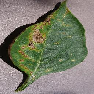

In [17]:
img

In [18]:
x = image.img_to_array(img)
x

array([[[113.,  98., 101.],
        [143., 128., 131.],
        [108.,  93.,  96.],
        ...,
        [165., 149., 150.],
        [170., 154., 155.],
        [163., 147., 148.]],

       [[111.,  96.,  99.],
        [131., 116., 119.],
        [134., 119., 122.],
        ...,
        [162., 146., 147.],
        [168., 152., 153.],
        [167., 151., 152.]],

       [[115., 100., 103.],
        [129., 114., 117.],
        [125., 110., 113.],
        ...,
        [173., 157., 158.],
        [169., 153., 154.],
        [174., 158., 159.]],

       ...,

       [[151., 138., 145.],
        [151., 138., 145.],
        [177., 164., 171.],
        ...,
        [169., 156., 165.],
        [173., 160., 169.],
        [164., 151., 160.]],

       [[200., 187., 194.],
        [202., 189., 196.],
        [158., 145., 152.],
        ...,
        [167., 154., 163.],
        [165., 152., 161.],
        [171., 158., 167.]],

       [[141., 128., 135.],
        [172., 159., 166.],
        [147., 1

In [19]:
x = np.expand_dims(x,axis=0)
x

array([[[[113.,  98., 101.],
         [143., 128., 131.],
         [108.,  93.,  96.],
         ...,
         [165., 149., 150.],
         [170., 154., 155.],
         [163., 147., 148.]],

        [[111.,  96.,  99.],
         [131., 116., 119.],
         [134., 119., 122.],
         ...,
         [162., 146., 147.],
         [168., 152., 153.],
         [167., 151., 152.]],

        [[115., 100., 103.],
         [129., 114., 117.],
         [125., 110., 113.],
         ...,
         [173., 157., 158.],
         [169., 153., 154.],
         [174., 158., 159.]],

        ...,

        [[151., 138., 145.],
         [151., 138., 145.],
         [177., 164., 171.],
         ...,
         [169., 156., 165.],
         [173., 160., 169.],
         [164., 151., 160.]],

        [[200., 187., 194.],
         [202., 189., 196.],
         [158., 145., 152.],
         ...,
         [167., 154., 163.],
         [165., 152., 161.],
         [171., 158., 167.]],

        [[141., 128., 135.],
       

In [20]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [21]:
early_stopping = EarlyStopping(monitor='val_accuracy',
                        patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                        patience=5,
                        factor=0.5,min_lr=0.00001)

callback = [reduce_lr,early_stopping]

In [22]:

img = image.load_img('/content/drive/MyDrive/Classroom/flowers/dandelion/10486992895_20b344ce2d_n.jpg',target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))


1/1 [==============================] - 0s 105ms/step
